<a href="https://colab.research.google.com/github/ShaunakSen/Deep-Learning/blob/master/Text_Classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python TensorFlow for Machine Learning – Neural Network Text Classification Tutorial


> Based on the video tutorial by Kylie Ying: https://www.youtube.com/watch?v=VtRLrQ3Ev-U

---

In [57]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('./diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Lets try to see the distribution of each feature in the form of a histogram and analyze wrt the target variable

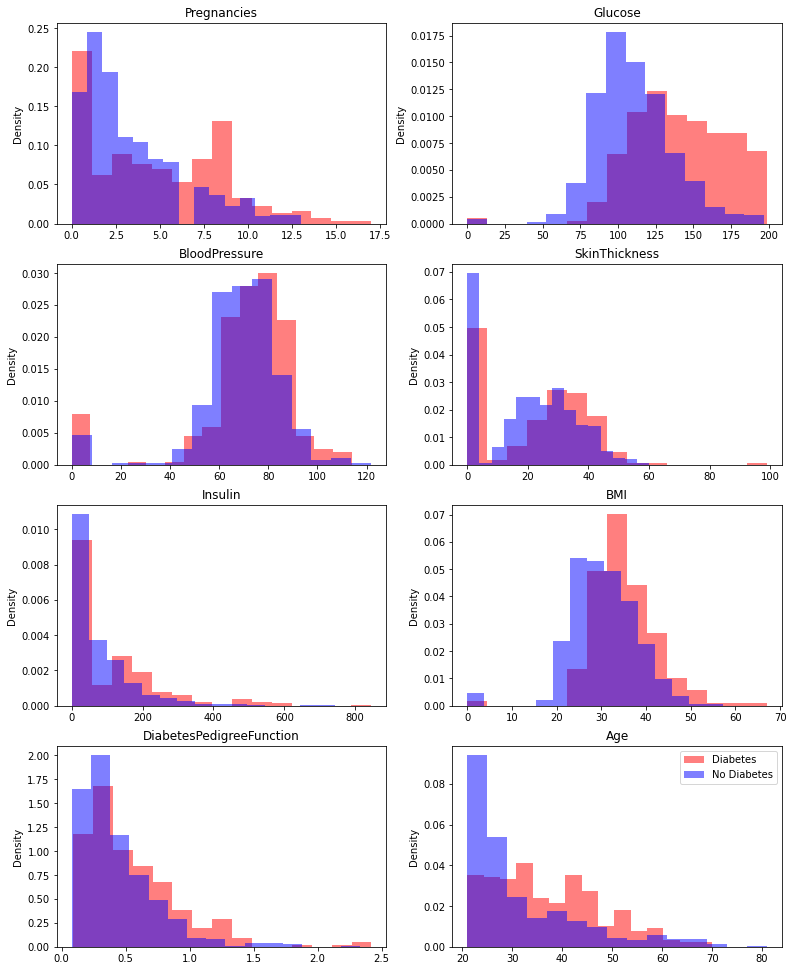

In [4]:
fig, axes = plt.subplots(4,2)
fig.set_figheight(17)
fig.set_figwidth(13)

row_idx, col_idx = 0, -1
for i, col_ in enumerate(df.columns[:-1]):

    if i > 0 and i%2 == 0:
        row_idx += 1
        col_idx = 0
    else:
        col_idx +=1

    axes[row_idx, col_idx].hist(df.loc[df['Outcome'] == 1][col_], color = 'red', label = 'Diabetes', alpha = 0.5, density=True, bins=15)
    axes[row_idx, col_idx].hist(df.loc[df['Outcome'] == 0][col_], color = 'blue', label = 'No Diabetes', alpha = 0.5, density=True, bins=15)
    axes[row_idx, col_idx].set_title(col_)
    axes[row_idx, col_idx].set_ylabel('Density')
plt.legend()
plt.show();
    
    

- there are some features which seem to impact diabetes - like :
    - pregnancies
    - glucose
    - skin thickness
    - BMI
    - Age

- no single feature clearly separates the two

In [21]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values
print (X.shape, y.shape)

(768, 8) (768,)


Split into train-test

- we want a 60-20-20 split for train-val-test

In [22]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, shuffle=True, stratify=y, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=True, stratify=y_temp, random_state=0)

print (X_train.shape, X_temp.shape, X_valid.shape, X_test.shape)
print (y_train.shape, y_temp.shape, y_valid.shape, y_test.shape)

(460, 8) (308, 8) (154, 8) (154, 8)
(460,) (308,) (154,) (154,)


Scale the values

In [25]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_valid_norm = scaler.transform(X_valid)
X_test_norm = scaler.transform(X_test)

print (X_train.shape, X_temp.shape, X_valid.shape, X_test.shape)
print (y_train.shape, y_temp.shape, y_valid.shape, y_test.shape)

(460, 8) (308, 8) (154, 8) (154, 8)
(460,) (308,) (154,) (154,)


In [37]:
for idx, col_ in enumerate(df.columns[:-1]):
    print (f'Transform {col_}: {np.max(X_train[:, idx])} -> {np.max(X_train_norm[:, idx])}')
    print (f'Transform {col_}: {np.max(X_valid[:, idx])} -> {np.max(X_valid_norm[:, idx])}')
    print (f'Transform {col_}: {np.max(X_test[:, idx])} -> {np.max(X_test_norm[:, idx])}')

Transform Pregnancies: 17.0 -> 3.7865185556706673
Transform Pregnancies: 15.0 -> 3.199856873081073
Transform Pregnancies: 12.0 -> 2.3198643491966804
Transform Glucose: 199.0 -> 2.461491046969458
Transform Glucose: 197.0 -> 2.3988247558215514
Transform Glucose: 198.0 -> 2.430157901395505
Transform BloodPressure: 122.0 -> 2.780891034307399
Transform BloodPressure: 114.0 -> 2.3544344353053894
Transform BloodPressure: 106.0 -> 1.9279778363033795
Transform SkinThickness: 63.0 -> 2.64310637042365
Transform SkinThickness: 99.0 -> 4.86109773021972
Transform SkinThickness: 50.0 -> 1.842165046052847
Transform Insulin: 846.0 -> 6.812643876505547
Transform Insulin: 545.0 -> 4.1671090469814684
Transform Insulin: 680.0 -> 5.353644601751403
Transform BMI: 67.1 -> 4.6147202436880566
Transform BMI: 57.3 -> 3.326184067424135
Transform BMI: 55.0 -> 3.0237725158519906
Transform DiabetesPedigreeFunction: 2.42 -> 5.601534304703201
Transform DiabetesPedigreeFunction: 1.731 -> 3.616620827024173
Transform Diab

Check distribution of class labels in each set

In [26]:
print (np.sum(y)/len(y))

print (np.sum(y_train)/len(y_train))
print (np.sum(y_temp)/len(y_temp))
print (np.sum(y_valid)/len(y_valid))
print (np.sum(y_test)/len(y_test))

0.3489583333333333
0.35
0.3474025974025974
0.35064935064935066
0.34415584415584416


Build the model

In [62]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=16, activation='relu'),
                             tf.keras.layers.Dense(units=16, activation='relu'),
                             tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [63]:
lr = 0.0007
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.BinaryCrossentropy()])

Lets simply see what the results are like without training

In [15]:
model.evaluate(x=X_train, y=y_train)

15/15 [==============================] - 0s 2ms/step - loss: 0.6507 - binary_accuracy: 0.6739 - binary_crossentropy: 0.6507


[0.650739848613739, 0.6739130616188049, 0.650739848613739]

In [16]:
model.evaluate(x=X_test, y=y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.8590 - binary_accuracy: 0.5974 - binary_crossentropy: 0.8590


[0.8589887022972107, 0.5974025726318359, 0.8589887022972107]

Train the model

In [43]:
model.fit(x=X_train, y=y_train, batch_size=32, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
15/15 [==============================] - 1s 17ms/step - loss: 16.6181 - binary_accuracy: 0.6500 - binary_crossentropy: 16.6181 - val_loss: 13.7068 - val_binary_accuracy: 0.6494 - val_binary_crossentropy: 13.7068
Epoch 2/30
15/15 [==============================] - 0s 5ms/step - loss: 10.1873 - binary_accuracy: 0.6500 - binary_crossentropy: 10.1873 - val_loss: 7.3395 - val_binary_accuracy: 0.5974 - val_binary_crossentropy: 7.3395
Epoch 3/30
15/15 [==============================] - 0s 4ms/step - loss: 5.0106 - binary_accuracy: 0.4630 - binary_crossentropy: 5.0106 - val_loss: 3.6282 - val_binary_accuracy: 0.4416 - val_binary_crossentropy: 3.6282
Epoch 4/30
15/15 [==============================] - 0s 4ms/step - loss: 2.4007 - binary_accuracy: 0.3891 - binary_crossentropy: 2.4007 - val_loss: 1.6674 - val_binary_accuracy: 0.4545 - val_binary_crossentropy: 1.6674
Epoch 5/30
15/15 [==============================] - 0s 5ms/step - loss: 1.3002 - binary_accuracy: 0.5109 - binary_crossen

In [44]:
model.evaluate(x=X_test, y=y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.9564 - binary_accuracy: 0.6234 - binary_crossentropy: 0.9564


[0.956444263458252, 0.6233766078948975, 0.956444263458252]

Here we get an accuracy of around 62% on the test data

Get predictions and evaluate the metrics:

In [52]:
y_pred = model.predict(X_test).flatten()

In [55]:
y_pred_labels = np.where(y_pred > 0.5, 1, 0)

In [60]:
def evaluate_performance(y_true, y_pred):
    """
    Evaluate model performance
    """
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred)

    tn, tp, fp, fn = cm[0][0], cm[1][1], cm[0][1], cm[1][0]

    precision = tp/(fp + tp)
    recall = tp/(tp + fn)

    accuracy = (tp + tn)/(tn+tp+fp+fn)

    f_score = 2 * (precision * recall)/(precision + recall)

    disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
    disp.plot()


    return {
        'precision': precision,
        'recall': recall,
        'accuracy': accuracy,
        'F score': f_score
    }


{'F score': 0.21621621621621623,
 'accuracy': 0.6233766233766234,
 'precision': 0.38095238095238093,
 'recall': 0.1509433962264151}

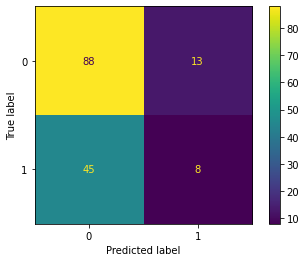

In [61]:
evaluate_performance(y_test, y_pred_labels)

Let us check how normalization affects the model performances

In [64]:
model.fit(x=X_train_norm, y=y_train, batch_size=32, epochs=30, validation_data=(X_valid_norm, y_valid))

Epoch 1/30
15/15 [==============================] - 1s 15ms/step - loss: 0.6842 - binary_accuracy: 0.5391 - binary_crossentropy: 0.6842 - val_loss: 0.6701 - val_binary_accuracy: 0.6104 - val_binary_crossentropy: 0.6701
Epoch 2/30
15/15 [==============================] - 0s 5ms/step - loss: 0.6571 - binary_accuracy: 0.6109 - binary_crossentropy: 0.6571 - val_loss: 0.6428 - val_binary_accuracy: 0.6623 - val_binary_crossentropy: 0.6428
Epoch 3/30
15/15 [==============================] - 0s 4ms/step - loss: 0.6335 - binary_accuracy: 0.6500 - binary_crossentropy: 0.6335 - val_loss: 0.6190 - val_binary_accuracy: 0.6558 - val_binary_crossentropy: 0.6190
Epoch 4/30
15/15 [==============================] - 0s 5ms/step - loss: 0.6119 - binary_accuracy: 0.6978 - binary_crossentropy: 0.6119 - val_loss: 0.5970 - val_binary_accuracy: 0.7078 - val_binary_crossentropy: 0.5970
Epoch 5/30
15/15 [==============================] - 0s 5ms/step - loss: 0.5931 - binary_accuracy: 0.7196 - binary_crossentropy:

In [65]:
y_pred = model.predict(X_test_norm).flatten()
y_pred_labels = np.where(y_pred > 0.5, 1, 0)

{'F score': 0.6542056074766356,
 'accuracy': 0.7597402597402597,
 'precision': 0.6481481481481481,
 'recall': 0.660377358490566}

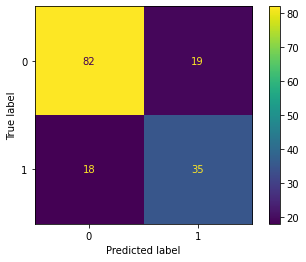

In [66]:
evaluate_performance(y_test, y_pred_labels)

> As we can see the scores improved significantly
